<a href="https://colab.research.google.com/github/sellaakhilaa/Feature-enginering/blob/main/correlation_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


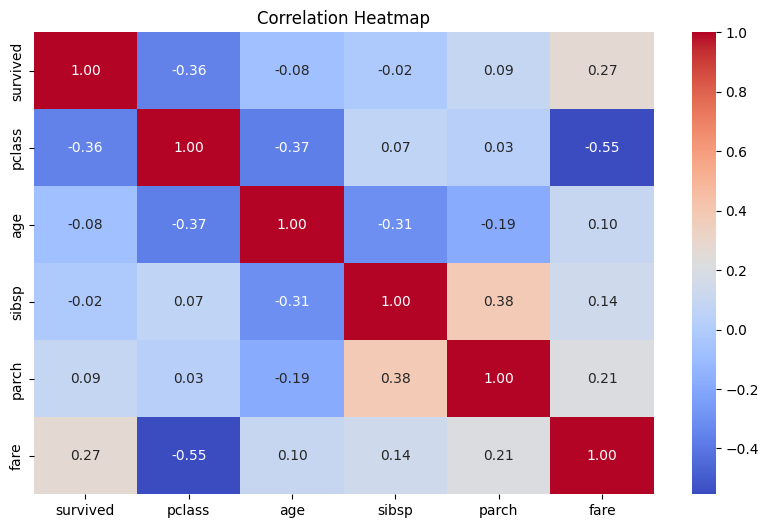

Highly correlated features to drop: set()
Selected features correlated with target: ['fare', 'pclass']
      fare  pclass  survived
0   7.2500       3         0
1  71.2833       1         1
2   7.9250       3         1
3  53.1000       1         1
4   8.0500       3         0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Drop rows with missing values
df_numeric = df_numeric.dropna()

print(df_numeric.head())
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Set correlation threshold
threshold = 0.8

# Create set to hold dropped columns
to_drop = set()

# Absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Loop through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix_abs.iloc[i, j] > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            to_drop.add(colname1)  # Drop one of the pair

print("Highly correlated features to drop:", to_drop)

# Drop selected features
df_reduced = df_numeric.drop(columns=to_drop)
# Compute correlation with target
target_corr = corr_matrix['survived'].sort_values(ascending=False)

# Set correlation threshold
min_corr = 0.1

# Select features
selected_features = target_corr[abs(target_corr) > min_corr].index.tolist()
selected_features.remove('survived')  # Remove target itself

print("Selected features correlated with target:", selected_features)
# Final dataset with selected features
final_df = df_numeric[selected_features + ['survived']]
print(final_df.head())
